In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pickle

In [100]:
df = pd.read_csv("ElecDeviceRatingPrediction_Milestone2.csv")

In [101]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Pentium Quad,Not Available,4 GB,LPDDR4X,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,45990,Bad Rating,0,0
1,ASUS,Intel,Core i5,10th,8 GB,LPDDR4,0 GB,512 GB,32-bit DOS,4 GB,Casual,No warranty,No,No,106167,Good Rating,1881,241
2,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,22990,Bad Rating,0,0
3,Lenovo,Intel,Core i3,11th,4 GB,DDR4,256 GB,0 GB,64-bit Windows,0 GB,Casual,1 year,No,Yes,44990,Good Rating,42,4
4,HP,AMD,Ryzen 7,Not Available,16 GB,DDR4,512 GB,0 GB,64-bit Windows,2 GB,Casual,1 year,No,Yes,79990,Bad Rating,23,6


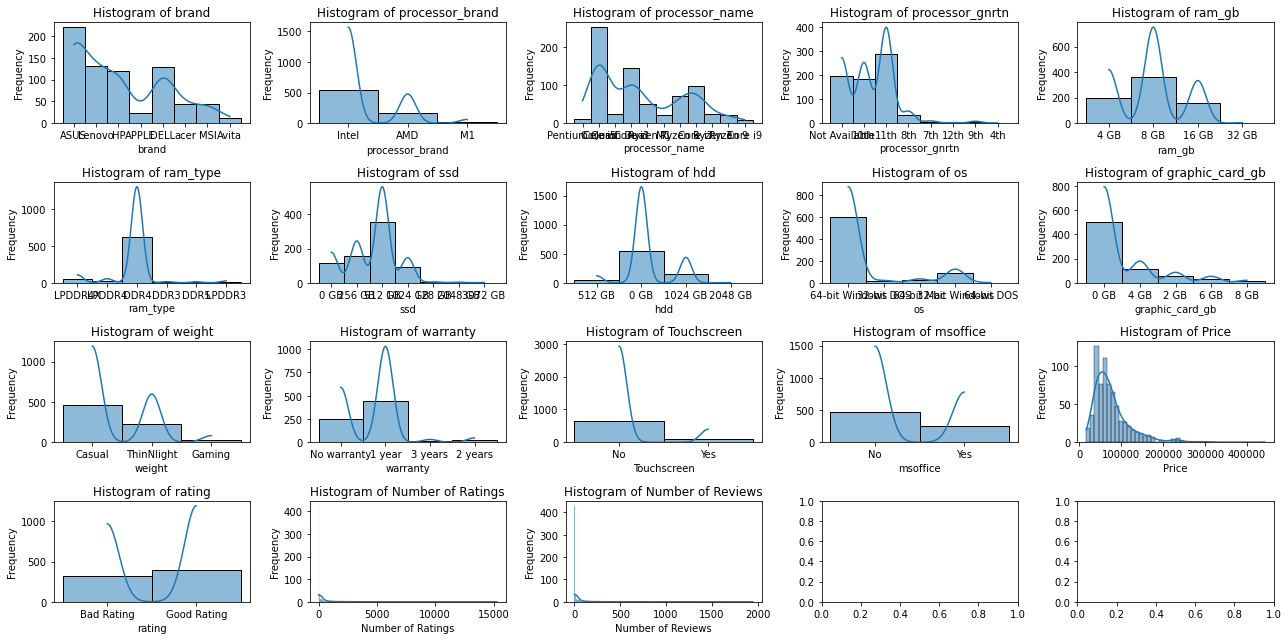

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df

# Calculate the number of rows and columns needed for the grid layout
num_rows = 4
num_cols = 5

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 9))

# Flatten the axes array to iterate over it
axes = axes.flatten()

# Iterate through each column in the DataFrame
for i, column in enumerate(df.columns):
    # Plot the histogram for the column on the corresponding subplot
    sns.histplot(df[column], kde=True, ax=axes[i])
    
    # Set the title and labels
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [103]:
colToSplit=['ram_gb','ssd','hdd','graphic_card_gb']
for col in colToSplit:
  splitted_data = df[col].str.split(' ')
  df[col] = [row[0] for row in splitted_data]
  df[col] = df[col].astype(int)
df.head()


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Pentium Quad,Not Available,4,LPDDR4X,0,512,64-bit Windows,0,Casual,No warranty,No,No,45990,Bad Rating,0,0
1,ASUS,Intel,Core i5,10th,8,LPDDR4,0,512,32-bit DOS,4,Casual,No warranty,No,No,106167,Good Rating,1881,241
2,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0,512,64-bit Windows,0,Casual,No warranty,No,No,22990,Bad Rating,0,0
3,Lenovo,Intel,Core i3,11th,4,DDR4,256,0,64-bit Windows,0,Casual,1 year,No,Yes,44990,Good Rating,42,4
4,HP,AMD,Ryzen 7,Not Available,16,DDR4,512,0,64-bit Windows,2,Casual,1 year,No,Yes,79990,Bad Rating,23,6


In [104]:
df.mode().iloc[0]

brand                          ASUS
processor_brand               Intel
processor_name              Core i5
processor_gnrtn                11th
ram_gb                            8
ram_type                       DDR4
ssd                             512
hdd                               0
os                   64-bit Windows
graphic_card_gb                   0
weight                       Casual
warranty                     1 year
Touchscreen                      No
msoffice                         No
Price                         64990
rating                  Good Rating
Number of Ratings                 0
Number of Reviews                 0
Name: 0, dtype: object

In [105]:
count_na = 0
for value in df['processor_gnrtn']:
    if value == 'Not Available':
        print(df['rating'])


0       Bad Rating
1      Good Rating
2       Bad Rating
3      Good Rating
4       Bad Rating
          ...     
718    Good Rating
719     Bad Rating
720    Good Rating
721    Good Rating
722     Bad Rating
Name: rating, Length: 723, dtype: object
0       Bad Rating
1      Good Rating
2       Bad Rating
3      Good Rating
4       Bad Rating
          ...     
718    Good Rating
719     Bad Rating
720    Good Rating
721    Good Rating
722     Bad Rating
Name: rating, Length: 723, dtype: object
0       Bad Rating
1      Good Rating
2       Bad Rating
3      Good Rating
4       Bad Rating
          ...     
718    Good Rating
719     Bad Rating
720    Good Rating
721    Good Rating
722     Bad Rating
Name: rating, Length: 723, dtype: object
0       Bad Rating
1      Good Rating
2       Bad Rating
3      Good Rating
4       Bad Rating
          ...     
718    Good Rating
719     Bad Rating
720    Good Rating
721    Good Rating
722     Bad Rating
Name: rating, Length: 723, dtype: object


In [106]:
mode_value = df['processor_gnrtn'].mode()
df.loc[df['processor_gnrtn'] == 'Not Available', 'processor_gnrtn'] = mode_value

In [107]:
df['processor_gnrtn'].unique()

array(['11th', '10th', '8th', '7th', '12th', '9th', '4th'], dtype=object)

In [108]:
coltoencode=['brand','processor_brand','processor_name','processor_gnrtn','ram_type','weight','warranty','os']

## Label Encoding

## One-hot Encoding

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              723 non-null    object
 1   processor_brand    723 non-null    object
 2   processor_name     723 non-null    object
 3   processor_gnrtn    723 non-null    object
 4   ram_gb             723 non-null    int32 
 5   ram_type           723 non-null    object
 6   ssd                723 non-null    int32 
 7   hdd                723 non-null    int32 
 8   os                 723 non-null    object
 9   graphic_card_gb    723 non-null    int32 
 10  weight             723 non-null    object
 11  warranty           723 non-null    object
 12  Touchscreen        723 non-null    object
 13  msoffice           723 non-null    object
 14  Price              723 non-null    int64 
 15  rating             723 non-null    object
 16  Number of Ratings  723 non-null    int64 
 1

In [110]:
df['rating'].unique()

array(['Bad Rating', 'Good Rating'], dtype=object)

In [111]:
X=df.drop("rating",axis=1)
Y=df["rating"]


## Feature Selection

## DATA SPLIT


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,shuffle=True,random_state=42)

In [113]:
y_train.value_counts()

Good Rating    319
Bad Rating     259
Name: rating, dtype: int64

In [114]:
encode = ['brand','processor_brand','processor_name','ram_type','os','weight','warranty', 'processor_gnrtn']
one_hot = ['Touchscreen','msoffice']
l_encode = X_train[encode]
one_encode_train = X_train[one_hot]
one_encode_test = X_test[one_hot]
X_train.processor_name.unique()

array(['Ryzen 3', 'Core i5', 'Core i3', 'Core i7', 'Ryzen 7', 'Ryzen 5',
       'Pentium Quad', 'Celeron Dual', 'Ryzen 9', 'Core i9', 'M1'],
      dtype=object)

In [115]:
def encoding_test(classes, X_test, column, label_encoders, cnt):
    encoded_values = []
    errors = {}
    for val in X_test[column]:
        try:
            if val in errors.keys():
                encoded_values.append(errors[val])
            else:
                val = label_encoders[column].transform(val)
                encoded_values.append(val)
        except ValueError as e:
            errors[val] = cnt
            encoded_values.append(cnt)
            np.append(label_encoders[column].classes_, cnt)
            cnt+=1
    return encoded_values

In [116]:

label_encoders = {}

for column in encode:
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])
    
    train_values_count = len(X_train[column].unique())
    try:
        # Transform the test data
        X_test[column] = label_encoders[column].transform(X_test[column])
    except ValueError as e:
        # If ValueError occurs (unseen labels), handle it by assigning a default value
        print(f"Error occurred for column '{column}': {e}")
        X_test[column] = encoding_test(label_encoders[column].classes_, X_test, column, label_encoders, train_values_count)
        print(X_test[column].unique())
        #X_test[column] = X_test[column].apply(encoding_test(label_encoders[column].classes_))
    




Error occurred for column 'processor_gnrtn': y contains previously unseen labels: '4th'
[ 6  7  8  9 10 11]


In [117]:
y_encoder = LabelEncoder()
y_train = y_encoder.fit_transform(y_train)
y_test = y_encoder.transform(y_test)
label_encoders['rating'] = y_encoder

In [118]:
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [119]:
# one-hot encoding train
one_encoded_train = pd.get_dummies(one_encode_train, columns=one_hot)
one_encoded_train [one_encoded_train  != False] = 1
one_encoded_train [one_encoded_train  != True] = 0
one_encoded_train.head()
for col in one_encoded_train.columns:
    one_encoded_train[col] = one_encoded_train[col].astype(int)
one_encoded_train.info()


# one-hot encoding test
one_encoded_test = pd.get_dummies(one_encode_test, columns=one_hot)
one_encoded_test [one_encoded_test  != False] = 1
one_encoded_test [one_encoded_test  != True] = 0
one_encoded_test.head()
for col in one_encoded_test.columns:
    one_encoded_test[col] = one_encoded_test[col].astype(int)
one_encoded_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 445 to 102
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Touchscreen_No   578 non-null    int32
 1   Touchscreen_Yes  578 non-null    int32
 2   msoffice_No      578 non-null    int32
 3   msoffice_Yes     578 non-null    int32
dtypes: int32(4)
memory usage: 13.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 336 to 136
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Touchscreen_No   145 non-null    int32
 1   Touchscreen_Yes  145 non-null    int32
 2   msoffice_No      145 non-null    int32
 3   msoffice_Yes     145 non-null    int32
dtypes: int32(4)
memory usage: 3.4 KB


In [120]:
# Combine Label and One-hot encoding
result_train = pd.concat([X_train, one_encoded_train], axis=1)
result_test = pd.concat([X_test, one_encoded_test], axis=1)
result_train.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,...,warranty,Touchscreen,msoffice,Price,Number of Ratings,Number of Reviews,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes
445,4,0,7,1,8,1,256,0,4,0,...,0,No,No,37990,2214,241,1,0,1,0
6,4,1,2,1,8,1,512,0,4,0,...,0,No,Yes,63990,3,0,1,0,0,1
363,1,1,2,1,8,1,512,0,4,0,...,0,No,Yes,53400,46,6,1,0,0,1
595,1,1,1,0,4,1,512,0,4,0,...,0,No,Yes,39990,2551,297,1,0,0,1
371,3,1,2,1,8,1,512,0,4,2,...,0,No,No,65990,10,0,1,0,1,0


In [121]:
X_train[result_train.columns] = result_train
X_test[result_test.columns] = result_test
X_train.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,...,warranty,Touchscreen,msoffice,Price,Number of Ratings,Number of Reviews,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes
445,4,0,7,1,8,1,256,0,4,0,...,0,No,No,37990,2214,241,1,0,1,0
6,4,1,2,1,8,1,512,0,4,0,...,0,No,Yes,63990,3,0,1,0,0,1
363,1,1,2,1,8,1,512,0,4,0,...,0,No,Yes,53400,46,6,1,0,0,1
595,1,1,1,0,4,1,512,0,4,0,...,0,No,Yes,39990,2551,297,1,0,0,1
371,3,1,2,1,8,1,512,0,4,2,...,0,No,No,65990,10,0,1,0,1,0


In [122]:
X_train.drop('Touchscreen', axis=1, inplace=True)
X_test.drop('Touchscreen', axis=1, inplace=True)
X_train.drop('msoffice', axis=1, inplace=True)
X_test.drop('msoffice', axis=1, inplace=True)

In [123]:
X_train_normalized = np.log(X_train+1e-10)
X_test_normalized = np.log(X_test+1e-10)
X_train_normalized[np.isinf(X_train_normalized)] = 0
X_test_normalized[np.isinf(X_test_normalized)] = 0
X_train_normalized.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Price,Number of Ratings,Number of Reviews,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes
445,1.386294e+00,-2.302585e+01,1.945910e+00,1.000000e-10,2.079442,1.000000e-10,5.545177,-23.025851,1.386294,-23.025851,0.693147,-23.025851,10.545078,7.702556,5.484797,1.000000e-10,-23.025851,1.000000e-10,-2.302585e+01
6,1.386294e+00,1.000000e-10,6.931472e-01,1.000000e-10,2.079442,1.000000e-10,6.238325,-23.025851,1.386294,-23.025851,0.693147,-23.025851,11.066482,1.098612,-23.025851,1.000000e-10,-23.025851,-2.302585e+01,1.000000e-10
363,1.000000e-10,1.000000e-10,6.931472e-01,1.000000e-10,2.079442,1.000000e-10,6.238325,-23.025851,1.386294,-23.025851,-23.025851,-23.025851,10.885566,3.828641,1.791759,1.000000e-10,-23.025851,-2.302585e+01,1.000000e-10
595,1.000000e-10,1.000000e-10,1.000000e-10,-2.302585e+01,1.386294,1.000000e-10,6.238325,-23.025851,1.386294,-23.025851,0.693147,-23.025851,10.596385,7.844241,5.693732,1.000000e-10,-23.025851,-2.302585e+01,1.000000e-10
371,1.098612e+00,1.000000e-10,6.931472e-01,1.000000e-10,2.079442,1.000000e-10,6.238325,-23.025851,1.386294,0.693147,-23.025851,-23.025851,11.097258,2.302585,-23.025851,1.000000e-10,-23.025851,1.000000e-10,-2.302585e+01


In [124]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# # instantiate the selector with chi-squared
selector = SelectKBest(chi2, k=16)

# # fit the selector on the categorical columns and transform it
X_train_selected = selector.fit_transform(X_train, y_train)

with open('FeatureSelection.pkl', 'wb') as f:
        pickle.dump(selector, f)

# get the names of the selected features
selected_features = X_train_normalized.columns[selector.get_support(indices=True)]
selected_features = X_test_normalized.columns[selector.get_support(indices=True)]

# print the names of the selected features
print("Selected features:", selected_features)
X_train = X_train_normalized[selected_features]
X_test = X_test_normalized[selected_features]

Selected features: Index(['processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd',
       'os', 'weight', 'warranty', 'Price', 'Number of Ratings',
       'Number of Reviews', 'Touchscreen_No', 'Touchscreen_Yes', 'msoffice_No',
       'msoffice_Yes'],
      dtype='object')


In [125]:
X_train.shape

(578, 16)

## Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
ogreg = LogisticRegression()
ogreg.fit(X_train, y_train)
y_pred = ogreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8827586206896552
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        65
           1       0.84      0.97      0.90        80

    accuracy                           0.88       145
   macro avg       0.90      0.87      0.88       145
weighted avg       0.89      0.88      0.88       145



d:\myApps\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVC

In [127]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the classifier on the training data
svc_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = svc_classifier.predict(X_test)

# Evaluate the classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8551724137931035
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        65
           1       0.79      1.00      0.88        80

    accuracy                           0.86       145
   macro avg       0.90      0.84      0.85       145
weighted avg       0.89      0.86      0.85       145



## Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8620689655172413
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        65
           1       0.83      0.95      0.88        80

    accuracy                           0.86       145
   macro avg       0.88      0.85      0.86       145
weighted avg       0.87      0.86      0.86       145



In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()


In [130]:
from sklearn.model_selection import cross_val_score
clf = [dtc,rfc,knn]
for algo in clf:
    score = cross_val_score( algo,X_train,y_train,cv = 5,scoring = 'accuracy')
    print("The accuracy score of {} is:".format(algo),score.mean())

The accuracy score of DecisionTreeClassifier() is: 0.8719940029985007
The accuracy score of RandomForestClassifier() is: 0.8874962518740629
The accuracy score of KNeighborsClassifier() is: 0.8858020989505248


In [131]:
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier()
clf = [('dtc',dtc),('rfc',rfc),('knn',knn)] #list of (str, estimator)
from sklearn.ensemble import StackingClassifier
lr = LogisticRegression()
stack_model = StackingClassifier( estimators = clf,final_estimator = lr)
score = cross_val_score(stack_model,X_train,y_train,cv = 5,scoring = 'accuracy')
print("The accuracy score of is:",score.mean())

The accuracy score of is: 0.8961019490254871
